# Segmentation overlap - pyKNEEr vs. ground truth

## Import packages

In [1]:
# use python's libraries for calculations
import numpy  as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

#import pandas as pd
#import scipy
#from scipy.stats.stats import pearsonr

### Comparison to ground truth

In [2]:


def show_comparison(image, cart_pykneer, cart_groundt, slice_id):
    # transform to numpy
    image_py        = sitk.GetArrayFromImage(image)
    cart_pykneer_py = sitk.GetArrayFromImage(cart_pykneer)
    cart_groundt_py = sitk.GetArrayFromImage(cart_groundt)

    # get slices
    slice_image_py        = image_py[:,:,slice_id]
    slice_cart_pykneer_py = cart_pykneer_py[:,:,slice_id]
    slice_cart_pykneer_py = np.ma.masked_where(slice_cart_pykneer_py == 0, slice_cart_pykneer_py)
    slice_cart_groundt_py = cart_groundt_py[:,:,slice_id]
    slice_cart_groundt_py = np.ma.masked_where(slice_cart_groundt_py == 0, slice_cart_groundt_py)

    # extract slice and create figure
    plt.rcParams['figure.figsize'] = [20, 12]
    fig     = plt.figure() # cannot call figures inside the for loop because python has a max of 20 figures (nOfImages can be larger)
    fig.tight_layout() # avoids subplots overlap
    # subplots characteristics
    nOfColumns = 1
    nOfRows    = 3

    # show image slice with pykneer segmentation
    ax = fig.add_subplot(nOfRows,nOfColumns,1)
    ax.imshow(slice_image_py,   'gray', interpolation=None, origin='lower')
    ax.imshow(slice_cart_pykneer_py, 'hsv' , interpolation=None, origin='lower', alpha=0.6)
    ax.set_title("pyKNEEr segmentation", fontsize=16)
    ax.axis('off')

    # show image slice with pykneer segmentation
    ax = fig.add_subplot(nOfRows,nOfColumns,2)
    ax.imshow(slice_image_py,   'gray', interpolation=None, origin='lower')
    ax.imshow(slice_cart_groundt_py, 'summer' , interpolation=None, origin='lower', alpha=0.6)
    ax.set_title("ground truth segmentation", fontsize=16)
    ax.axis('off')

    # show image slice with pykneer segmentation
    ax = fig.add_subplot(nOfRows,nOfColumns,3)
    ax.imshow(slice_cart_pykneer_py, 'hsv' , interpolation=None, origin='lower', alpha=0.6)
    ax.imshow(slice_cart_groundt_py, 'summer' , interpolation=None, origin='lower', alpha=0.6)
    ax.set_title("segmentation comparison", fontsize=16)
    # axis off but leaving the square
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    
    # for saving
    return fig

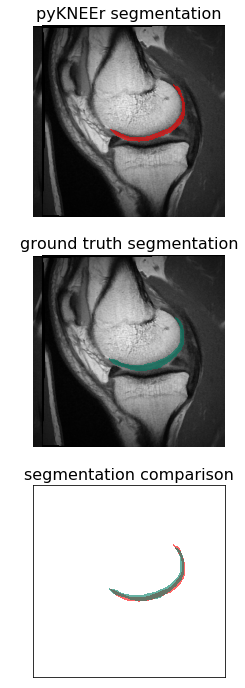

In [3]:
# OAI1
ID = "YR04_11_T2"
parentFolder = "/Volumes/SereHD/work/data_pyKNEEr/OAI1/"
image        = sitk.ReadImage(parentFolder + "preprocessed/" + ID + "_0_prep.mha") # loaded prep for better visualization range
cart_pykneer = sitk.ReadImage(parentFolder + "segmented/" + ID + "_0_prep_fc.mha")
cart_groundt = sitk.ReadImage(parentFolder + "segmented_QM/" + ID + "_QM_fc.mha")
slice_id = 10
fig = show_comparison(image, cart_pykneer, cart_groundt, slice_id)
plt.savefig("fig_segmentation_comparison_1.pdf", bbox_inches='tight') # bbox_inches='tight' saves without white margins

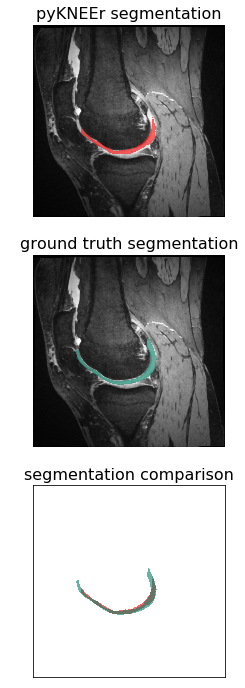

In [4]:
# OAI2
ID = "030_BL" 
parentFolder = "/Volumes/SereHD/work/data_pyKNEEr/OAI2/"
image        = sitk.ReadImage(parentFolder + "preprocessed/" + ID + "_prep.mha") # loaded prep for better visualization range
cart_pykneer = sitk.ReadImage(parentFolder + "segmented/" + ID + "_prep_fc.mha")
cart_groundt = sitk.ReadImage(parentFolder + "segmented_IM/" + ID + "_IM_fc.mha")
slice_id = 59 
show_comparison(image, cart_pykneer, cart_groundt, slice_id)
plt.savefig("fig_segmentation_comparison_2.pdf", bbox_inches='tight') # bbox_inches='tight' saves without white margins

### Dependencies

In [5]:
%load_ext watermark
%watermark -v -m -p numpy,SimpleITK,matplotlib

CPython 3.7.1
IPython 6.5.0

numpy 1.15.1
SimpleITK unknown
matplotlib 2.2.3

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
